# Mini Project: Chess

Team 11
Group members:
- Chua You Wang, Nathan-Hope U2323920B
- Doo Hong Wen, Evan U2321097A
- Low Wei Jie U2321418G

# Importing the various libraries

In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Importing the dataset

"games.csv" is imported from Kaggle, a file containing records of 20,000+ chess games from lichess.com

In [2]:
df = pd.read_csv("games.csv")
df.info()
df.head() #prints out the items in the file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


#  Cleaning the dataset

We want to change the headings to make the column headers more readable and nicer. 

We removed columns that are not relevant for integer types so that we can compare relevant columns for exploratory analysis

We added a new column "Time control" to categorize the time controls of the games that were played. We used increment code which varies massively, to classify the type of games conventional names such as "Bullet", "Blitz", "Rapid", "Classical"


In [3]:
# Rename columns
df.rename(columns={'id': 'Game ID', 
                   'rated': 'Rated', 
                   'turns': 'Turns', 
                   'victory_status': 'Victory Status',
                   'winner': 'Winner',
                   'increment_code': 'Increment Code',
                   'white_rating': 'White Rating',
                   'black_rating': 'Black Rating',
                   'moves': 'Moves',
                   'opening_eco': 'Opening ECO',
                   'opening_name': 'Opening Name',
                   'opening_ply' : 'Opening Ply',
                   'created_at' : 'Created At',
                   'last_move_at': 'Last Move At',
                   'white_id': 'White ID',
                   'black_id': 'Black ID',
                   
                  }, inplace=True)

In [4]:
import pandas as pd

def classify_time_control(increment_code):
    time_control = int(increment_code.split('+')[0])
    if time_control < 3:
        return 'Bullet'
    elif 3 <= time_control <= 10:
        return 'Blitz'
    elif 10 < time_control <= 60:
        return 'Rapid'
    else:
        return 'Classical'

# Assuming your DataFrame is called 'df', you can directly apply the classification function
df['Time Control'] = df['Increment Code'].apply(classify_time_control)

print(df)


        Game ID  Rated    Created At  Last Move At  Turns Victory Status  \
0      TZJHLljE  False  1.504210e+12  1.504210e+12     13      outoftime   
1      l1NXvwaE   True  1.504130e+12  1.504130e+12     16         resign   
2      mIICvQHh   True  1.504130e+12  1.504130e+12     61           mate   
3      kWKvrqYL   True  1.504110e+12  1.504110e+12     61           mate   
4      9tXo1AUZ   True  1.504030e+12  1.504030e+12     95           mate   
...         ...    ...           ...           ...    ...            ...   
20053  EfqH7VVH   True  1.499791e+12  1.499791e+12     24         resign   
20054  WSJDhbPl   True  1.499698e+12  1.499699e+12     82           mate   
20055  yrAas0Kj   True  1.499698e+12  1.499698e+12     35           mate   
20056  b0v4tRyF   True  1.499696e+12  1.499697e+12    109         resign   
20057  N8G2JHGG   True  1.499643e+12  1.499644e+12     78           mate   

      Winner Increment Code       White ID  White Rating            Black ID  \
0      

In [5]:
#Showing the new format, with additional time control column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Game ID         20058 non-null  object 
 1   Rated           20058 non-null  bool   
 2   Created At      20058 non-null  float64
 3   Last Move At    20058 non-null  float64
 4   Turns           20058 non-null  int64  
 5   Victory Status  20058 non-null  object 
 6   Winner          20058 non-null  object 
 7   Increment Code  20058 non-null  object 
 8   White ID        20058 non-null  object 
 9   White Rating    20058 non-null  int64  
 10  Black ID        20058 non-null  object 
 11  Black Rating    20058 non-null  int64  
 12  Moves           20058 non-null  object 
 13  Opening ECO     20058 non-null  object 
 14  Opening Name    20058 non-null  object 
 15  Opening Ply     20058 non-null  int64  
 16  Time Control    20058 non-null  object 
dtypes: bool(1), float64(2), int64(4

# Explanation of important variables
Opening Ply - When white moves, it is 1 ply. Then, when black responds, it is another ply. Opening Ply is the number of plys made in the opening.

Turns - Each move made by white, then black constitutes 1 turn. So, 2 plys constitute 1 turn.

Opening ECO - ECO = Encyclopaedia of Chess Openings. Each opening eco has a unique code, for example,'A00'

Black / White Rating - ELO of each side at the start of the game

Winner - Indicates the outcome of the game (Black / White / Draw)

Increment Code - XX+YY, where X would time in minutes, Y is time in seconds. Each player gets X minutes at the start of the game and Y would be the seconds added to his time after he makes a move. 

Time Control - The mode of the game, i.e Bullet, Blitz, Rapid and Classical. Each mode increasing order of duration accordingly. 


# Exploratory data analysis

In [6]:
df.describe()

,Created At,Last Move At,Turns,White Rating,Black Rating,Opening Ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


In [7]:
# Remove unnecessary columns (replace "columns_to_remove" with the names of the columns you want to remove)
columns_to_remove = ['Created At', 'Last Move At']
df = df.drop(columns=columns_to_remove)

# Display the updated columns
df.describe()

,Turns,White Rating,Black Rating,Opening Ply
count,20058.000000,20058.000000,20058.000000,20058.000000
mean,60.465999,1596.631868,1588.831987,4.816981
std,33.570585,291.253376,291.036126,2.797152
min,1.000000,784.000000,789.000000,1.000000
25%,37.000000,1398.000000,1391.000000,3.000000
50%,55.000000,1567.000000,1562.000000,4.000000
75%,79.000000,1793.000000,1784.000000,6.000000
max,349.000000,2700.000000,2723.000000,28.000000


# Evaluation of data:
Taking white rating as reference for players:

Mean for white rating is 1596. 
In lichess, players are given a provisional rating of 1500.

The standard deviation of white rating is 291. Which tells us that in one standard deviation from the mean, players will have a difference of 291 elo points.
1SD away from mean = 1305 or 1887. In chess terms, that is a large difference in skill level for players. This means that our data is quite spread out.

Finally, our max ELO rating for white is 2700 while the 75% quartile is ~ 1800. Thus, players above 1800 are quite spread out.

==============================================================================================================================
Reading the data given for number of Turns:

Mean = 60 turns
60 turns for a game is a long game as some games can last up to 30 Turns.
We have a standard deviation of 33. 
1SD apart from the mean = 27 or 93. These number of moves tell that the data in the set are quite spread out.

At the 75% quartile, the number of turns is 79. However, the game with the highest number of turns is 349.
This tell us that we will have a lot of outliers and we will probably have a positively skewed data set for 'Turns'

# Plotting the numerical values for visual representation

C:\Users\Nathan\AppData\Local\Temp\ipykernel_24828\3396849334.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['White Rating'], shade=True, color='b')


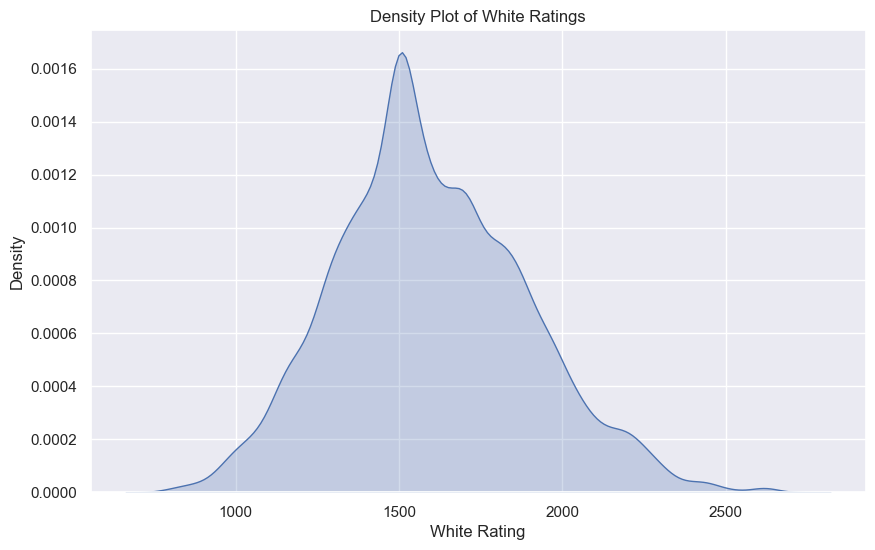

Skewness of White Rating: 0.30074368523207734


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Create a kernel density plot for the 'White Rating' column
plt.figure(figsize=(10, 6))  # Set the figure size
sns.kdeplot(data=df['White Rating'], shade=True, color='b')

# Add title and labels
plt.title('Density Plot of White Ratings')
plt.xlabel('White Rating')
plt.ylabel('Density')

# Show the plot
plt.show()

from scipy.stats import skew

# Calculate the skewness of the 'Turns' column
skewness = skew(df['White Rating'])

print("Skewness of White Rating:", skewness)


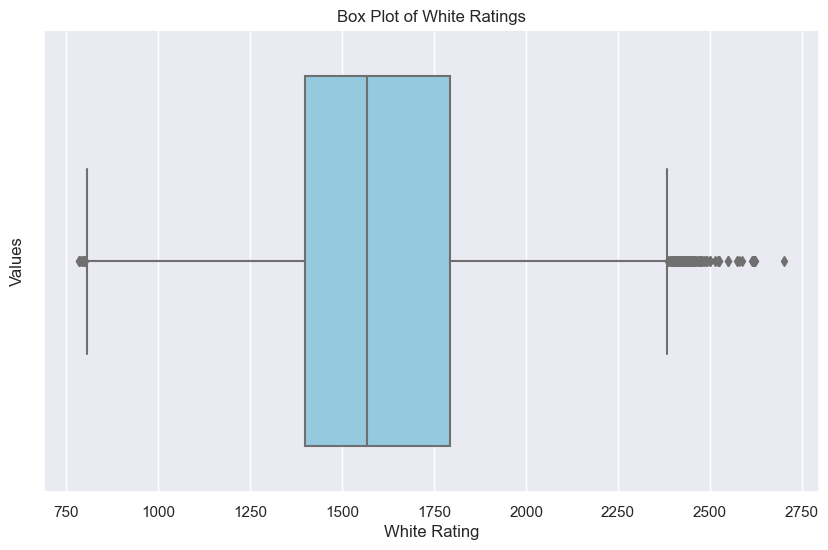

Number of outliers for White Rating: 135
Outliers for White Rating:
        Game ID  Rated  Turns Victory Status Winner Increment Code   White ID  \
39     G5S21pXK  False     34         resign  white          30+30    rajuppi   
43     oqoT4DLS  False     66         resign  white          40+40    rajuppi   
48     tLnhk43J  False     35           mate  white          40+40    rajuppi   
49     iq3Kz06t  False     41           mate  white          40+40    rajuppi   
637    TovD1oTY   True     58         resign  black           10+0     loebas   
...         ...    ...    ...            ...    ...            ...        ...   
18407  npIM0mRF  False    106         resign  white          60+30      fedai   
18414  5YY4b6Og  False     40      outoftime  black          15+30      fedai   
19016  upN6B2c0  False     69         resign  white          10+15  lance5500   
19235  NPyFrVPh  False     22         resign  white          30+30    rajuppi   
19614  M3lOLm8y  False     57         res

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Create a box plot for the 'White Rating' column
plt.figure(figsize=(10, 6))  # Set the figure size
sns.boxplot(x='White Rating', data=df, color='skyblue')

# Add title and labels
plt.title('Box Plot of White Ratings')
plt.xlabel('White Rating')
plt.ylabel('Values')

# Show the plot
plt.show()

# Calculate the first quartile (Q1) and third quartile (Q3) for 'White Rating'
Q1_white = df['White Rating'].quantile(0.25)
Q3_white = df['White Rating'].quantile(0.75)

# Calculate the interquartile range (IQR) for 'White Rating'
IQR_white = Q3_white - Q1_white

# Define the lower and upper bounds for outliers for 'White Rating'
lower_bound_white = Q1_white - 1.5 * IQR_white
upper_bound_white = Q3_white + 1.5 * IQR_white

# Find outliers for 'White Rating'
outliers_white = df[(df['White Rating'] < lower_bound_white) | (df['White Rating'] > upper_bound_white)]

print("Number of outliers for White Rating:", len(outliers_white))
print("Outliers for White Rating:")
print(outliers_white)





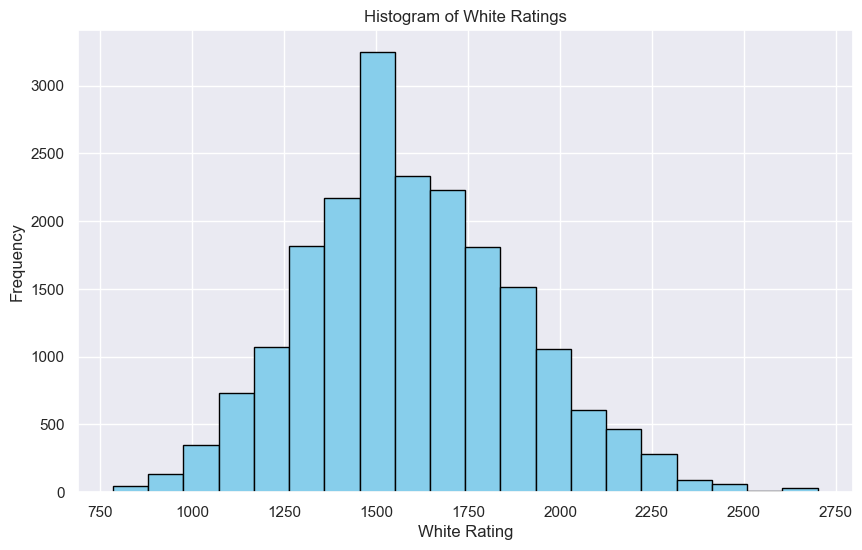

In [10]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df and you want to plot a histogram for the 'White Rating' column
plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(df['White Rating'], bins=20, color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Histogram of White Ratings')
plt.xlabel('White Rating')
plt.ylabel('Frequency')

# Show the plot
plt.show()




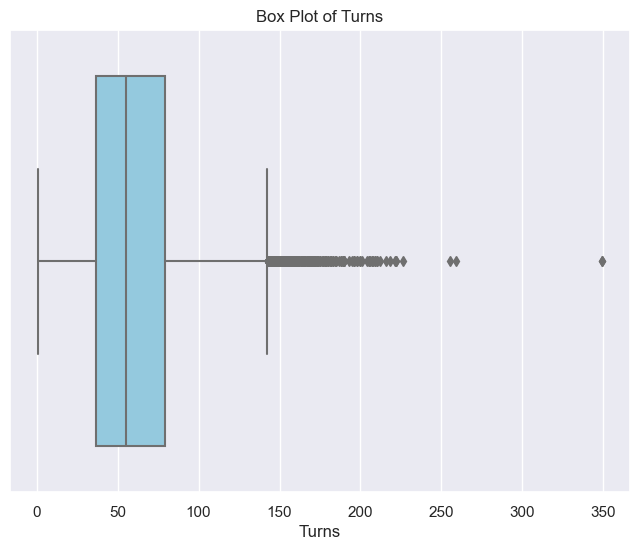

Number of outliers: 428
Outliers:
        Game ID  Rated  Turns Victory Status Winner Increment Code  \
148    JbLparSt   True    156           mate  black          15+15   
176    fPPfEuu5  False    144      outoftime   draw           10+0   
180    46AuHfcq   True    158           mate  black            6+6   
190    OmwDxZpJ   True    178           mate  black           16+0   
213    mJ9VpdxV   True    159           mate  white           15+1   
...         ...    ...    ...            ...    ...            ...   
19842  gK3xiIiz  False    171      outoftime  white           10+0   
19882  iAYf1BKl   True    146         resign  black           10+0   
19893  MqXMaILz   True    156           mate  black           10+0   
19922  sZWZWLUP   True    159           mate  white           25+0   
19940  eUcF6dTf   True    171           mate  white           20+5   

            White ID  White Rating          Black ID  Black Rating  \
148           sassou          1226  vladimir_shindin   

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Create a box plot for the 'Turns' column
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x='Turns', data=df, color='skyblue')

# Add title and labels
plt.title('Box Plot of Turns')
plt.xlabel('Turns')
plt.ylabel('')

# Show the plot
plt.show()

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['Turns'].quantile(0.25)
Q3 = df['Turns'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['Turns'] < lower_bound) | (df['Turns'] > upper_bound)]

print("Number of outliers:", len(outliers))
print("Outliers:")
print(outliers)



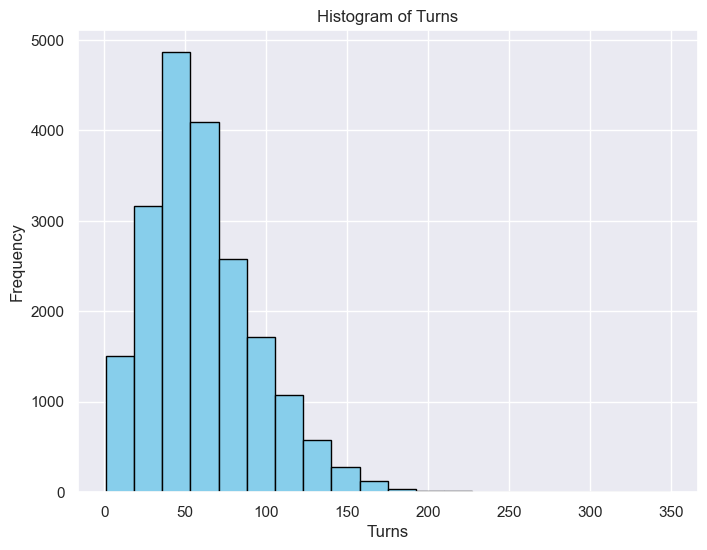

In [12]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Create a histogram for the 'Turns' column
plt.figure(figsize=(8, 6))  # Set the figure size
plt.hist(df['Turns'], bins=20, color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Histogram of Turns')
plt.xlabel('Turns')
plt.ylabel('Frequency')

# Show the plot
plt.show()


C:\Users\Nathan\AppData\Local\Temp\ipykernel_24828\3371483526.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['Turns'], shade=True, color='skyblue')


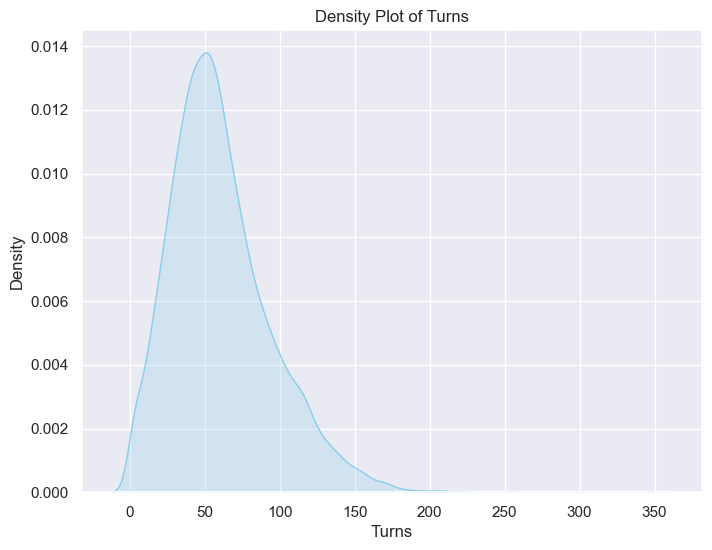

Skewness of Turns: 0.89721666835643


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Create a density plot for the 'Turns' column
plt.figure(figsize=(8, 6))  # Set the figure size
sns.kdeplot(data=df['Turns'], shade=True, color='skyblue')

# Add title and labels
plt.title('Density Plot of Turns')
plt.xlabel('Turns')
plt.ylabel('Density')

# Show the plot
plt.show()

from scipy.stats import skew

# Calculate the skewness of the 'Turns' column
skewness = skew(df['Turns'])

print("Skewness of Turns:", skewness)



# Evaluation of the exploratory analysis
For the variable 'White Rating':
- Outliers: 135 games 
- Skew: positive, 0.3007 (4.s.f)
- Histogram shows us that the highest group that player's rating fall under is 1500.

For the variable 'Turns':
- Outliers: 428 games
- Skew: 0.8972 (4.s.f)
- Histogram tell us that the highest group of games are about less than 50 turns.

# Machine learning

Cleaning set further by removing all games below 2000, for more expert games.

Furthermore, we removed games that ended up in a draw.

In [14]:
# Create a replicate DataFrame with rows where both 'white_rating' and 'black_rating' are 2000 and above
replicate_df = df[(df['White Rating'] >= 2000) & (df['Black Rating'] >= 2000)].copy()

# Display the first few rows of the replicate DataFrame
print(replicate_df.head())

# Get the number of people
num_people = len(replicate_df)
print(" ")
print("Number of people with ratings 2000 and above for both white and black players:", num_people)

      Game ID  Rated  Turns Victory Status Winner Increment Code  \
636  xSwSmC1e   True     86         resign  black           10+0   
637  TovD1oTY   True     58         resign  black           10+0   
638  u0FzSAO8   True     50         resign  black           10+0   
639  1YmgTIJI   True     62         resign  black           10+0   
642  78hLyDK0   True     43         resign  white           10+0   

              White ID  White Rating   Black ID  Black Rating  \
636             chilon          2306  chesscarl          2405   
637             loebas          2422  chesscarl          2386   
638  thelordoftheboard          2373  chesscarl          2356   
639       lebbeusz2450          2325  chesscarl          2338   
642          chesscarl          2329    a_b_d_o          2017   

                                                 Moves Opening ECO  \
636  e4 e5 Nf3 Nc6 Nc3 Nf6 Nxe5 Nxe5 d4 Nc6 d5 Bb4 ...         C46   
637  e4 c5 d4 cxd4 c3 Nf6 e5 Nd5 cxd4 d6 exd6 Qxd6 ...      

In [15]:
new_df = replicate_df[replicate_df['Winner'] != 'draw'].copy()

# Display the first few rows of the new DataFrame
print(new_df.head())

num_people = len(new_df)
print(" ")
print("Number of rows where the winner is not a draw:", num_people)

      Game ID  Rated  Turns Victory Status Winner Increment Code  \
636  xSwSmC1e   True     86         resign  black           10+0   
637  TovD1oTY   True     58         resign  black           10+0   
638  u0FzSAO8   True     50         resign  black           10+0   
639  1YmgTIJI   True     62         resign  black           10+0   
642  78hLyDK0   True     43         resign  white           10+0   

              White ID  White Rating   Black ID  Black Rating  \
636             chilon          2306  chesscarl          2405   
637             loebas          2422  chesscarl          2386   
638  thelordoftheboard          2373  chesscarl          2356   
639       lebbeusz2450          2325  chesscarl          2338   
642          chesscarl          2329    a_b_d_o          2017   

                                                 Moves Opening ECO  \
636  e4 e5 Nf3 Nc6 Nc3 Nf6 Nxe5 Nxe5 d4 Nc6 d5 Bb4 ...         C46   
637  e4 c5 d4 cxd4 c3 Nf6 e5 Nd5 cxd4 d6 exd6 Qxd6 ...      

In [16]:
# Group the data by 'Opening ECO' and 'Winner', and count the occurrences
grouped = new_df.groupby(['Opening ECO', 'Winner']).size().unstack(fill_value=0)

# Calculate total number of games for each Opening ECO
grouped['Total'] = grouped['black'] + grouped['white']

# Calculate winning percentages for white and black
grouped['White_win_percentage'] = grouped['white'] / grouped['Total']
grouped['Black_win_percentage'] = grouped['black'] / grouped['Total']

# Display the results
print(grouped[['Total', 'White_win_percentage', 'Black_win_percentage']])

Winner       Total  White_win_percentage  Black_win_percentage
Opening ECO                                                   
A00             16              0.812500              0.187500
A01              5              0.800000              0.200000
A02              2              0.500000              0.500000
A03              3              0.000000              1.000000
A04              9              0.666667              0.333333
...            ...                   ...                   ...
E76              2              0.500000              0.500000
E77              1              0.000000              1.000000
E90              2              0.000000              1.000000
E97              1              0.000000              1.000000
E98              1              1.000000              0.000000

[222 rows x 3 columns]


# Steps to take before Binary classification tree
1. Convert the column 'Winner' to 'Is White Winner' to make a boolean variable.
2. Do one hot encoding for Opening ECO
3. Clean data frame by removing non numeric and non-boolean, as well as unnecessary columns
4. Apply machine learning.

In [17]:
# Replace values in the 'Winner' column with boolean values
new_df['Winner'] = new_df['Winner'].replace({'white': True, 'black': False})

# Rename the column to 'Is White Winner'
new_df.rename(columns={'Winner': 'Is White Winner'}, inplace=True)

new_df

,Game ID,Rated,Turns,Victory Status,Is White Winner,Increment Code,White ID,White Rating,Black ID,Black Rating,Moves,Opening ECO,Opening Name,Opening Ply,Time Control
636,xSwSmC1e,True,86,resign,False,10+0,chilon,2306,chesscarl,2405,e4 e5 Nf3 Nc6 Nc3 Nf6 Nxe5 Nxe5 d4 Nc6 d5 Bb4 ...,C46,Four Knights Game: Halloween Gambit,7,Blitz
637,TovD1oTY,True,58,resign,False,10+0,loebas,2422,chesscarl,2386,e4 c5 d4 cxd4 c3 Nf6 e5 Nd5 cxd4 d6 exd6 Qxd6 ...,B22,Sicilian Defense: Alapin Variation | Smith-Mo...,8,Blitz
638,u0FzSAO8,True,50,resign,False,10+0,thelordoftheboard,2373,chesscarl,2356,e4 c5 Nf3 Nc6 d4 cxd4 Nxd4 Nf6 Nc3 e5 Ndb5 d6 ...,B33,Sicilian Defense: Lasker-Pelikan Variation | ...,17,Blitz
639,1YmgTIJI,True,62,resign,False,10+0,lebbeusz2450,2325,chesscarl,2338,d4 Nf6 Nf3 d5 g3 Bf5 Bg2 e6 O-O Be7 c4 c6 Nc3 ...,D02,Queen's Pawn Game: Symmetrical Variation | Ps...,5,Blitz
642,78hLyDK0,True,43,resign,True,10+0,chesscarl,2329,a_b_d_o,2017,d4 Nf6 c4 c5 d5 e6 Nc3 exd5 cxd5 d6 e4 g6 f4 B...,A67,Benoni Defense: Taimanov Variation,15,Blitz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20009,58iZoULg,True,62,resign,False,30+30,neil1996,2007,moistvonlipwig,2249,d4 Nf6 c4 e6 Nf3 b6 g3 Bb7 Bg2 Be7 Nc3 O-O O-O...,E17,Queen's Indian Defense: Classical Variation | ...,14,Rapid
20013,Uk0pZCRR,True,95,resign,False,45+45,kferapont,2094,moistvonlipwig,2228,e4 e5 Nf3 Nc6 Bb5 g6 d4 exd4 Bxc6 dxc6 Qxd4 Qx...,C60,Ruy Lopez: Fianchetto Defense,6,Rapid
20015,fpqjttDx,True,42,resign,False,7+30,waltersafarian,2162,moistvonlipwig,2214,d4 Nf6 c4 e6 Nf3 Bb4+ Bd2 a5 e3 O-O Bd3 b6 O-O...,E11,Bogo-Indian Defense: Wade-Smyslov Variation,8,Blitz
20016,lzPgCJCS,True,102,resign,False,7+30,moistvonlipwig,2236,waltersafarian,2148,e4 g6 Nc3 Bg7 f4 c6 g3 d6 Bg2 e5 fxe5 dxe5 d3 ...,B06,Modern Defense,2,Blitz


In [18]:
import pandas as pd

# Assuming new_df is your DataFrame with the 'Opening ECO' column
# Perform one-hot encoding on the 'Opening ECO' column
new_df_encoded = pd.get_dummies(new_df, columns=['Opening ECO'])

# Now new_df_encoded contains the original DataFrame with 'Opening ECO' column one-hot encoded

# Assuming df is your dataframe
matching_columns = [col for col in new_df_encoded.columns if col.startswith("Opening ECO_")]

In [19]:
# Select only numeric and boolean columns
numeric_boolean_columns = new_df_encoded.select_dtypes(include=['number', 'bool']).columns

# Drop non-numeric columns from the DataFrame
new_df_numeric_boolean = new_df_encoded[numeric_boolean_columns]

# Drop the 'Rated' column from the DataFrame
new_df_numeric_boolean.drop(columns=['Rated'], inplace=True)

# Now new_df_numeric_boolean contains only the numeric and boolean columns from the original DataFrame
df = new_df_numeric_boolean

df

C:\Users\Nathan\AppData\Local\Temp\ipykernel_24828\2765138597.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_numeric_boolean.drop(columns=['Rated'], inplace=True)


,Turns,Is White Winner,White Rating,Black Rating,Opening Ply,Opening ECO_A00,Opening ECO_A01,Opening ECO_A02,Opening ECO_A03,Opening ECO_A04,...,Opening ECO_E64,Opening ECO_E67,Opening ECO_E68,Opening ECO_E70,Opening ECO_E73,Opening ECO_E76,Opening ECO_E77,Opening ECO_E90,Opening ECO_E97,Opening ECO_E98
636,86,False,2306,2405,7,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
637,58,False,2422,2386,8,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
638,50,False,2373,2356,17,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
639,62,False,2325,2338,5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
642,43,True,2329,2017,15,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20009,62,False,2007,2249,14,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20013,95,False,2094,2228,6,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20015,42,False,2162,2214,8,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20016,102,False,2236,2148,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
# Assuming your dataframe is df
# Assuming predictor variables are one-hot encoded boolean columns starting with 'Opening ECO_'
# Assuming response variable is 'Is White Winner'

# Extract predictor variables (X)
X = df.filter(regex=r'^Opening ECO_', axis=1)  # Select columns starting with 'Opening ECO_'

# Extract response variable (y)
y = df['Is White Winner']  # Assuming 'Is White Winner' is the response variable

# Display the shape of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (776, 222)
Shape of y: (776,)


Accuracy of the decision tree model: 0.5256410256410257


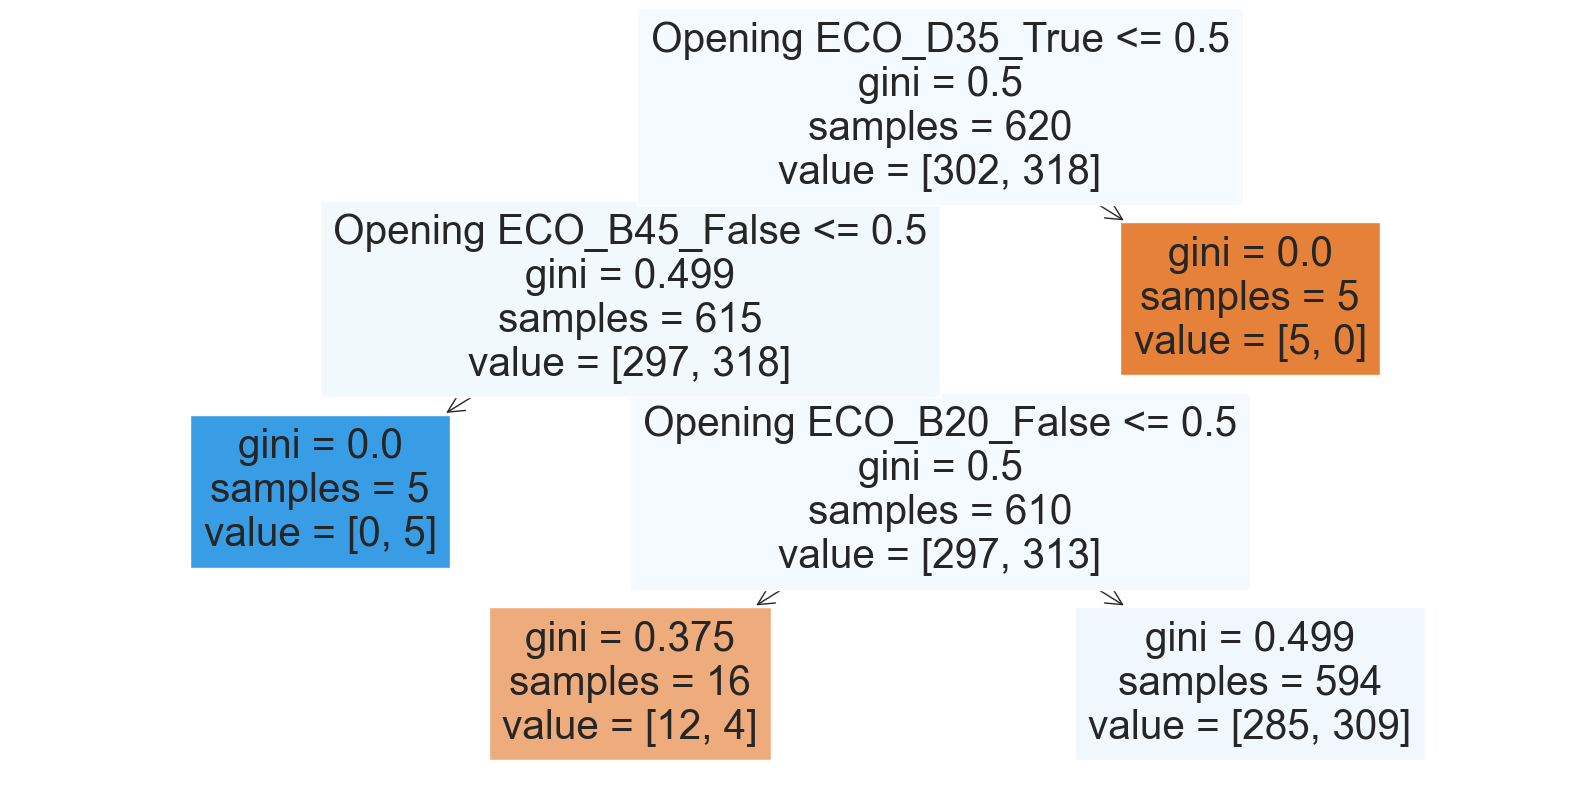

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


predictor_columns = matching_columns 

# Assuming your response variable is the column 'Is White Winner'
response_column = 'Is White Winner'

# Splitting the data into predictor and response variables
X = df[predictor_columns]
y = df[response_column]

# One-hot encoding categorical variables in the predictor data
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Creating and fitting the decision tree model
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

# Evaluating the model
accuracy = model.score(X_test, y_test)
print("Accuracy of the decision tree model:", accuracy)


# Plotting the decision tree
plt.figure(figsize=(20,10))  # Adjust the figure size if needed
plot_tree(model, feature_names=encoder.get_feature_names_out(predictor_columns).tolist(), filled=True)
plt.show()


Accuracy of the decision tree model: 0.5256410256410257


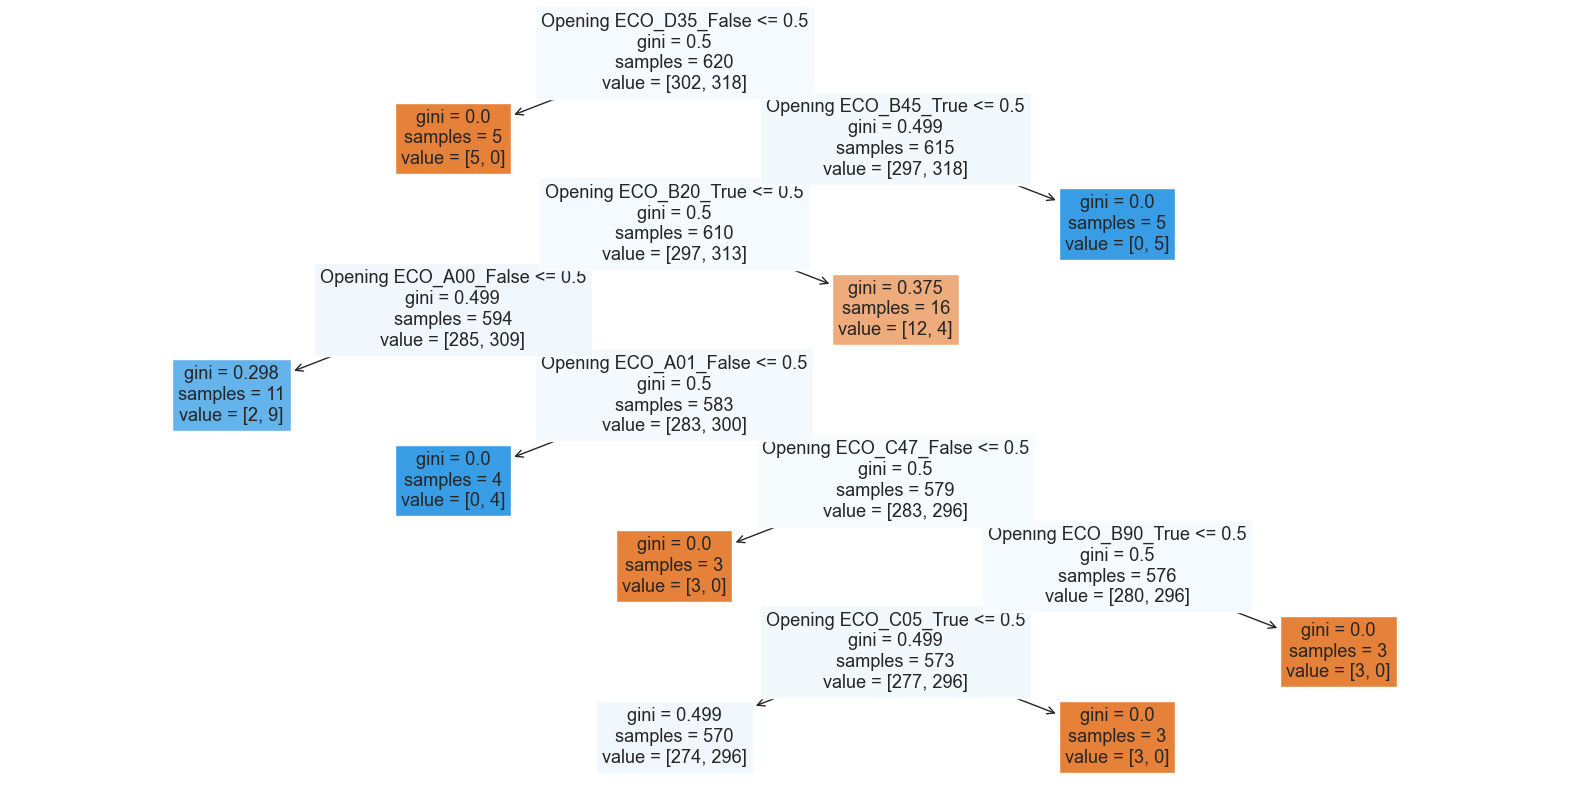

In [22]:
model = DecisionTreeClassifier(max_depth=8)
model.fit(X_train, y_train)

# Evaluating the model
accuracy = model.score(X_test, y_test)
print("Accuracy of the decision tree model:", accuracy)


# Plotting the decision tree
plt.figure(figsize=(20,10))  # Adjust the figure size if needed
plot_tree(model, feature_names=encoder.get_feature_names_out(predictor_columns).tolist(), filled=True)
plt.show()


# Results
From the above, we can tell which opening type favours the different opponent's side, given that they are very skilled,
i.e ratings >= 2000 for both sides.

In the classification tree, values = [a,b] where a is the number of games that black won and b is the number of games white won, in the opening type. 

As can be read off from the tree, we see that opening ECO D35 = Queen's gambit favours black to win, B45 = Sicilian defense, Taimanov variation favours white to win, so on and so forth. This is if players have studied the opening theory by heart before playing the game.


# Evaluating the correctness of the binary classification tree

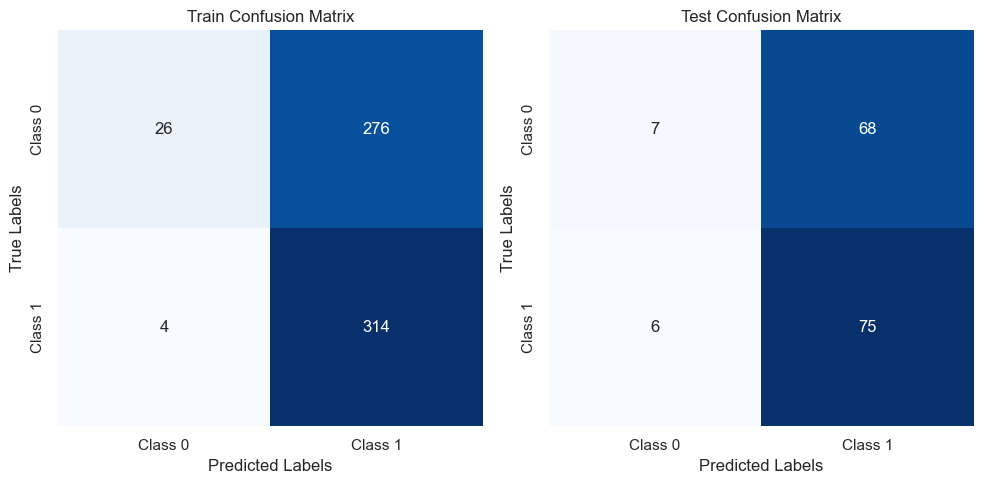

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions on train set
train_predictions = model.predict(X_train)

# Predictions on test set
test_predictions = model.predict(X_test)

# Confusion matrix for train set
train_cm = confusion_matrix(y_train, train_predictions)

# Confusion matrix for test set
test_cm = confusion_matrix(y_test, test_predictions)

# Plotting confusion matrix for train set
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Train Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Plotting confusion matrix for test set
plt.subplot(1, 2, 2)
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.tight_layout()
plt.show()


In [24]:
# Calculate TPR, FPR, TNR, FNR
TPR = train_cm[1, 1] / (train_cm[1, 1] + train_cm[1, 0])
FPR = train_cm[0, 1] / (train_cm[0, 1] + train_cm[0, 0])
TNR = train_cm[0, 0] / (train_cm[0, 0] + train_cm[0, 1])
FNR = train_cm[1, 0] / (train_cm[1, 0] + train_cm[1, 1])

print("Train Set Metrics:")
print("True Positive Rate (Sensitivity):", TPR)
print("False Positive Rate:", FPR)
print("True Negative Rate (Specificity):", TNR)
print("False Negative Rate:", FNR)

# Repeat for the test set
TPR_test = test_cm[1, 1] / (test_cm[1, 1] + test_cm[1, 0])
FPR_test = test_cm[0, 1] / (test_cm[0, 1] + test_cm[0, 0])
TNR_test = test_cm[0, 0] / (test_cm[0, 0] + test_cm[0, 1])
FNR_test = test_cm[1, 0] / (test_cm[1, 0] + test_cm[1, 1])

print("\nTest Set Metrics:")
print("True Positive Rate (Sensitivity):", TPR_test)
print("False Positive Rate:", FPR_test)
print("True Negative Rate (Specificity):", TNR_test)
print("False Negative Rate:", FNR_test)


Train Set Metrics:
True Positive Rate (Sensitivity): 0.9874213836477987
False Positive Rate: 0.9139072847682119
True Negative Rate (Specificity): 0.08609271523178808
False Negative Rate: 0.012578616352201259

Test Set Metrics:
True Positive Rate (Sensitivity): 0.9259259259259259
False Positive Rate: 0.9066666666666666
True Negative Rate (Specificity): 0.09333333333333334
False Negative Rate: 0.07407407407407407
